# Klasifikace na z√°kladƒõ vzd√°lenosti

√öloha zamƒõ≈ôen√° na implementaci vybran√Ωch klasifikaƒçn√≠ch algoritm≈Ø na z√°kladƒõ vzd√°lenosti.


## K-NN (Metoda nejbli≈æ≈°√≠ho souseda)
K-NN je neparametrickou vzd√°lenostn√≠ metodou.

**Uƒçen√≠:**
* ulo≈æen√≠ v≈°ech $N$ tr√©novac√≠ch dat
* zn√°me hodnoty dat a p≈ô√≠slu≈°nost ka≈æd√©ho vzorku k nƒõjak√© t≈ô√≠dƒõ

**Klasifikace do celkem $K$ t≈ô√≠d $c_0...c_k$ :**

* Pro klasifikovan√Ω p≈ô√≠znakov√Ω vektor $x$ je nalezen vzorek $(ùíô_ùëñ, ùëê_ùëñ)$, kter√Ω je mu nejbl√≠≈æe a na z√°kladƒõ jeho p≈ô√≠slu≈°nosti k jedn√© ze t≈ô√≠d je rozhodnuto o klasifikaci:
$$ x \in c_k \leftrightarrow dist(x, x_i) < dist(x, x_j) $$  
kde $x_i \in c_k$

![image info](data/knn_image.png)


Zdroj: https://www.datacamp.com/community/tutorials/k-nearest-neighbor-classification-scikit-learn   

### Reprezentace t≈ô√≠d etalony (centroidy)
Etalon je p≈ôedstavitelem t≈ô√≠dy, kter√Ω ji nejl√©pe reprezentuje ve smyslu vzd√°lenosti ke v≈°em prvk≈Øm tr√©novac√≠ mno≈æiny.
Etalon je buƒè skuteƒçn√Ωm prvkem t≈ô√≠dy, nebo m≈Ø≈æe vzniknout v√Ωpoƒçtem.
Pro **ka≈ædou t≈ô√≠du** je etalon stanoven v pr≈Øbƒõhu uƒçen√≠ syst√©mu.
    
#### Vzd√°lenostn√≠ klasifikace pomoc√≠ etalon≈Ø:
**Uƒçen√≠:**
* Pro ka≈ædou t≈ô√≠du se urƒç√≠ jej√≠ etalon (centroid)
* Je urƒçen jako pr≈Ømƒõrn√Ω prvek

**Klasifikace do celkem $K$ t≈ô√≠d $c_0...c_k$ :**

* Pro klasifikovan√Ω p≈ô√≠znakov√Ω vektor $x$ je nalezen centroid $(ùíô_ùëñ, ùëê_ùëñ)$, kter√Ω je mu nejbl√≠≈æe, a na z√°kladƒõ jeho p≈ô√≠slu≈°nosti k jedn√© ze t≈ô√≠d je rozhodnuto o klasifikaci:
$$ x \in c_k \leftrightarrow dist(x, x_i) < dist(x, x_j) $$  
kde $x_i \in c_k$
 
### Vzd√°lenostn√≠ funkce
#### Hammiltonov√° vz√°lenost (L1) 
$$ d(x,z) = \sum_{i=0}^{Dim}{|x_i - z_i|} $$

#### Euklidovsk√° vzd√°lenost (L2)
$$ d(x,z) = \sqrt{\sum_{i=0}^{Dim}{(x_i - z_i)^2}} $$

P≈ôi implementaci jde vynechat operaci druh√© odmocniny, proto≈æe druh√° odmocnina je monot√≥nn√≠ rostouc√≠ funkce. To znamen√°, ≈æe se mƒõn√≠ jenom absolutn√≠ hodnoty vzd√°lenosti, ale po≈ôad√≠ se zachov√°v√°:
$$ d(x,z) = \sum_{i=0}^{Dim}{(x_i - z_i)^2} $$


### V√Ωpoƒçet √∫spƒõ≈°nosti
$$ accuracy = \frac{\text{poƒçet spr√°vnƒõ klasifikovan√Ωch objekt≈Ø}}{\text{poƒçet v≈°ech klasifikovan√Ωch objekt≈Ø}} $$


### Vektor p≈ô√≠znak≈Ø
Klasifikovan√Ω objekt lze reprezentovat jako vektor p≈ô√≠znak≈Ø s rozmƒõrem D.
Hodnoty vektoru budou odpov√≠dat hodnot√°m jasu jednotliv√Ωch pixel≈Ø, kde $a$ je ≈°√≠≈ôka obr√°zku a $b$ v√Ω≈°ka v pixelech.
Prostor p≈ô√≠znak≈Ø ‚Äì 2D p≈ô√≠klad:
Objekty pat≈ô√≠c√≠ do jednotliv√Ωch t≈ô√≠d maj√≠ podobn√© hodnoty p≈ô√≠znak≈Ø.
Vytv√°≈ô√≠ v prostoru p≈ô√≠znak≈Ø shluky (jsou bl√≠zko sebe)


## Dvƒõ t≈ô√≠dy

In [1]:
import numpy as np
import usu


In [2]:
npzfile = np.load('data/data_04.npz')
npzfile.files


['testData', 'testRef', 'trainData', 'trainRef']

In [3]:
testData = npzfile['testData'] # body, 1 radek je 1 bod se souradnici[x,y]
testRef = npzfile['testRef']# tridy 0 a 1

trainData = npzfile['trainData']
trainRef = npzfile['trainRef']


In [4]:
trainData.shape, trainRef.shape, testData.shape, testRef.shape


((1900, 2), (1900, 1), (100, 2), (100, 1))

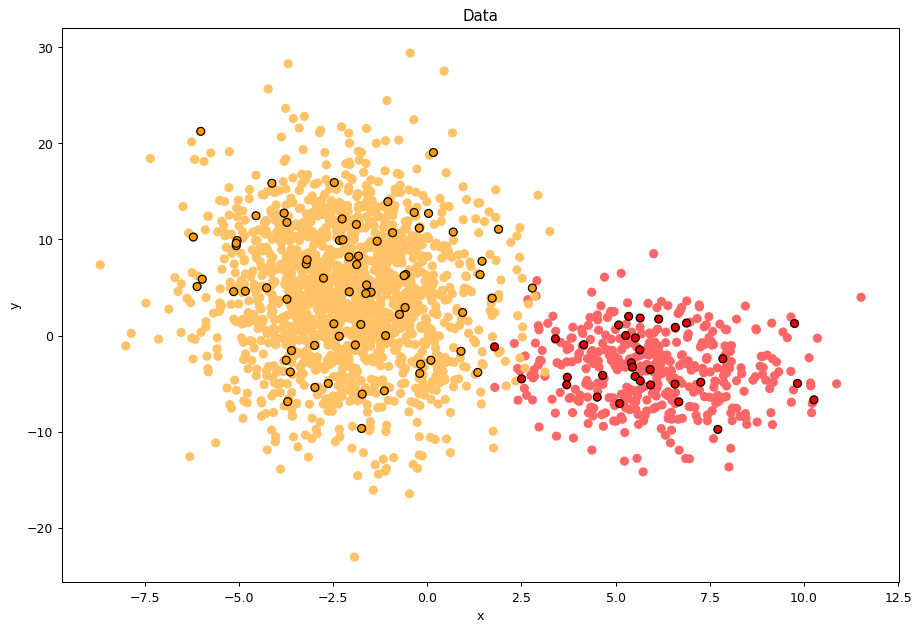

In [5]:
usu.draw2d(trainData, trainRef, testData, testRef )


In [6]:
from collections import Counter


class KNN:
    
   
    def __init__ (self, k=1, distance='l1'):
        """
        k - pocet sousedu
        distance: l1(hammiltonova) nebo l2(euklidovska)
        """
        self.k = k
        self.distance = distance
        
        self.train_data = None
        self.train_targets = None
    
        
    def train(self, train_data, train_targets, etalons=False):
        """
            
        """
        #################################################################
        # ZDE DOPLNIT

        if (etalons):          
            #do promƒõnn√© self.train_data ulo≈æte etalony a nastavte jim odpov√≠daj√≠c√≠ t≈ô√≠du do self.train_targets
            classes = np.unique(train_targets)
            etals = np.zeros((len(classes), len(train_data[0])))
            for i, d in enumerate(train_data):
                c = int(train_targets[i][0])
                etals[c] = etals[c] + d
            for i in range(len(classes)):
                etals[i] = etals[i] / np.sum(train_targets == classes[i])

            self.train_data = etals
            classes = [np.array([c]) for c in classes]
            self.train_targets = classes

        else:    
            self.train_data = train_data # matice priznaku
            self.train_targets = train_targets # vektor trid
            
        #################################################################
        
    def classification(self, test_data, test_targets):        
       
        
        #################################################################
        # ZDE DOPLNIT

        accuracy = 0
        for i in range(len(test_data)):
            neighbours = []
            for j in range(len(self.train_data)):
                if (self.distance == "l1"):
                    distance = np.sum(np.abs(test_data[i] - self.train_data[j]))
                elif (self.distance == "l2"):
                    distance = np.sum((test_data[i] - self.train_data[j])**2)
                neighbours.append((distance, self.train_targets[j][0]))
                neighbours.sort(key=lambda x: x[0])
                if (len(neighbours) > self.k):
                    neighbours.pop()
            classes = [x[1] for x in neighbours]
            prediction = Counter(classes).most_common(1)[0][0]
            if (test_targets[i] == prediction):
                accuracy += 1

        accuracy = accuracy / len(test_data) * 100
        
        return accuracy
        #################################################################

### Implementace bez pou≈æit√≠ etalon≈Ø

In [7]:
print("metrika l1:")
for k in range(1,10): 
    knn = KNN(k, 'l1') 
    knn.train(trainData, trainRef)
    acc = knn.classification(testData, testRef)
    print(f" k = {k}, accuracy: {acc:.2f} %")


metrika l1:


 k = 1, accuracy: 97.00 %
 k = 2, accuracy: 97.00 %
 k = 3, accuracy: 98.00 %
 k = 4, accuracy: 98.00 %
 k = 5, accuracy: 98.00 %
 k = 6, accuracy: 98.00 %
 k = 7, accuracy: 99.00 %
 k = 8, accuracy: 99.00 %
 k = 9, accuracy: 99.00 %


In [8]:
print("\nmetrika l2:")
for k in range(1,10): 
    knn = KNN(k, 'l2') 
    knn.train(trainData, trainRef)
    acc = knn.classification(testData,testRef)
    print(f" k = {k}, accuracy: {acc:.2f} %")



metrika l2:


 k = 1, accuracy: 97.00 %
 k = 2, accuracy: 97.00 %
 k = 3, accuracy: 98.00 %
 k = 4, accuracy: 98.00 %
 k = 5, accuracy: 99.00 %
 k = 6, accuracy: 99.00 %
 k = 7, accuracy: 99.00 %
 k = 8, accuracy: 99.00 %
 k = 9, accuracy: 99.00 %


### Reprezentace t≈ô√≠d etalony (centroidy)

In [9]:
k=1
knn = KNN(k, 'l1') 
knn.train(trainData,trainRef, True)
print(knn.train_data.shape, trainData.shape, type(knn.train_data), type(trainData)) #zkontrolujeme jestli velikosti a typ jsou stejny

acc = knn.classification(testData,testRef)
print(f"acc with l1, k = {k} is {acc:.2f} %")

knn = KNN(k, 'l2') 
knn.train(trainData,trainRef, True)
acc = knn.classification(testData,testRef)
print(f"acc with l2, k = {k} is {acc:.2f} %")

(2, 2) (1900, 2) <class 'numpy.ndarray'> <class 'numpy.ndarray'>
acc with l1, k = 1 is 92.00 %
acc with l2, k = 1 is 89.00 %


## T≈ôi t≈ô√≠dy

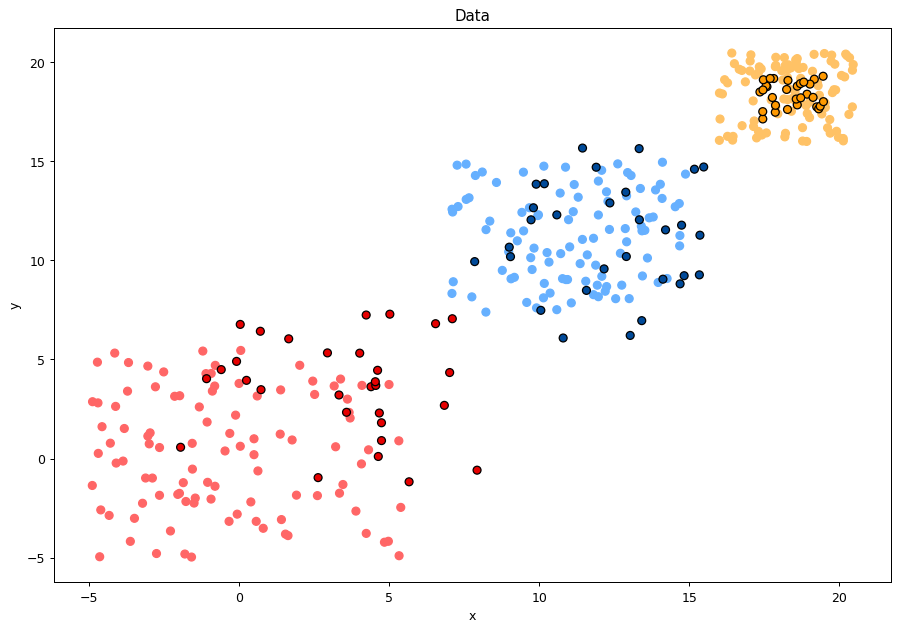

In [10]:
npzfile = np.load('data/data_04_3cl.npz')

testData = npzfile['testData']
testRef = npzfile['testRef']
trainData = npzfile['trainData']
trainRef = npzfile['trainRef']

usu.draw2d(trainData, trainRef, testData, testRef)


### Implementace bez pou≈æit√≠ etalon≈Ø

In [11]:
trainData.shape, trainRef.shape, testData.shape, testRef.shape

((300, 2), (300, 1), (90, 2), (90, 1))

In [12]:
print("metrika l1:")
for k in range(1,5): 
    knn = KNN(k, 'l1') 
    knn.train(trainData, trainRef)
    acc = knn.classification(testData, testRef)
    print(f" k = {k}, accuracy: {acc:.2f} %")


metrika l1:
 k = 1, accuracy: 96.67 %


 k = 2, accuracy: 96.67 %
 k = 3, accuracy: 96.67 %
 k = 4, accuracy: 96.67 %


In [13]:
print("\nmetrika l2:")
for k in range(1,5): 
    knn = KNN(k, 'l2') 
    knn.train(trainData, trainRef)
    acc = knn.classification(testData,testRef)
    print(f" k = {k}, accuracy: {acc:.2f} %")



metrika l2:


 k = 1, accuracy: 95.56 %
 k = 2, accuracy: 95.56 %
 k = 3, accuracy: 95.56 %
 k = 4, accuracy: 95.56 %


### Reprezentace t≈ô√≠d etalony (centroidy)

In [371]:
k=1
knn = KNN(k, 'l1') 
knn.train(trainData,trainRef, True)

acc = knn.classification(testData,testRef)
print(f"acc with l1, k = {k} is {acc:.2f} %")

knn = KNN(k, 'l2') 
knn.train(trainData,trainRef, True)
acc = knn.classification(testData,testRef)
print(f"acc with l2, k = {k} is {acc:.2f} %")


83 90
acc with l1, k = 1 is 92.22 %
83 90
acc with l2, k = 1 is 92.22 %


### Z√°vƒõr:
 1. Rozhodnƒõte, kdy je vhodnƒõj≈°√≠ pou≈æ√≠t kter√Ω algoritmus.
 2. Urƒçete slo≈æitost algoritm≈Ø.

In [ ]:
# 1. NN je jednodu≈°≈°√≠, KNN p≈ôesnƒõj≈°√≠ d√≠ky volbƒõ parametru k (m√©nƒõ n√°chyln√Ω na extr√©my).
# 2. O(m*n), kde m je poƒçet dimenz√≠ a n je poƒçet tr√©novac√≠ch dat.